In [20]:
import pandas as pd
import gmaps
import matplotlib.pyplot as plt
from scipy.stats import linregress

from config import g_key 

In [4]:
latlng_df = pd.DataFrame(pd.read_csv("CenPop2010CountyCenters.csv"))
latlng_df.head()

,STATEFP,COUNTYFP,COUNAME,STNAME,POPULATION,LATITUDE,LONGITUDE
0,6,1,Alameda,California,1510271,37.705201,-122.100393
1,6,3,Alpine,California,1175,38.728298,-119.847603
2,6,5,Amador,California,38091,38.394208,-120.775729
3,6,7,Butte,California,220000,39.669037,-121.707635
4,6,9,Calaveras,California,45578,38.163627,-120.633718


In [5]:
PCSA_df = pd.DataFrame(pd.read_csv("Primary_Care_Shortage_Areas_(PCSA).csv"))
PCSA_df.head() 

,OBJECTID,UNIT_COUNT,CNTY_FIPS,COUNTY,MSSA_ID,MSSA_NAME,DEFINITION,POPDENSITY,AREA_SQMI,POP,PCSA,PCSA_SCORE,PC_PHYS,PC_PHYS_R_CIV,POVScore,PHYSRatioScore,Shape__Area,Shape__Length
0,1,11,1,Alameda,1.1,Livermore Central and West/Spring Town,Urban,1752.000139,0.472102,43860,0,2,48.0,1186.104167,1,1,0.008283,0.489279
1,2,8,1,Alameda,1.2,Altamont/Livermore East/Midway/Mountain House/...,Rural,116.545153,1.950268,32480,1,6,12.0,3167.333333,1,5,0.086298,1.651976
2,3,12,7,Butte,10,Oroville/Palermo/Thermalito,Rural,175.468375,7.768868,42656,1,5,34.0,1408.352941,4,1,0.075224,1.615445
3,4,1,49,Modoc,100,Adin/Lookout/Newell,Frontier,2.315574,956.134376,1454,1,7,0.0,0.000000,2,5,0.267075,3.281548
4,5,2,51,Mono,102,Benton/Bridgeport/Chalfant/Crowley Lake/Colevi...,Frontier,1.957937,1452.267904,5343,1,6,1.0,5951.000000,1,5,0.813804,5.793963


In [6]:
PCSA_df.drop(columns=['OBJECTID','CNTY_FIPS','DEFINITION','MSSA_NAME','Shape__Area','UNIT_COUNT', 'POVScore',
'Shape__Length','PC_PHYS_R_CIV', 'MSSA_ID', 'POPDENSITY', 'AREA_SQMI', 'POP', 'PCSA', 'PC_PHYS', 'PCSA_SCORE'], inplace=True)
PCSA_df = PCSA_df.loc[PCSA_df['PHYSRatioScore'].isnull().values == False]

PCSA_df.head()

,COUNTY,PHYSRatioScore
0,Alameda,1
1,Alameda,5
2,Butte,1
3,Modoc,5
4,Mono,5


In [7]:
PCSA_merged_df = PCSA_df.merge(latlng_df, how='outer', left_on=PCSA_df['COUNTY'] , right_on=latlng_df['COUNAME'])
PCSA_merged_df.head()

,key_0,COUNTY,PHYSRatioScore,STATEFP,COUNTYFP,COUNAME,STNAME,POPULATION,LATITUDE,LONGITUDE
0,Alameda,Alameda,1,6,1,Alameda,California,1510271,37.705201,-122.100393
1,Alameda,Alameda,5,6,1,Alameda,California,1510271,37.705201,-122.100393
2,Alameda,Alameda,0,6,1,Alameda,California,1510271,37.705201,-122.100393
3,Alameda,Alameda,0,6,1,Alameda,California,1510271,37.705201,-122.100393
4,Alameda,Alameda,0,6,1,Alameda,California,1510271,37.705201,-122.100393


In [8]:
PCSA_merged_df.drop(columns=['key_0', 'STATEFP', 'COUNTYFP','STNAME', 'POPULATION', 'COUNAME'], inplace=True)
PCSA_merged_df.head()

,COUNTY,PHYSRatioScore,LATITUDE,LONGITUDE
0,Alameda,1,37.705201,-122.100393
1,Alameda,5,37.705201,-122.100393
2,Alameda,0,37.705201,-122.100393
3,Alameda,0,37.705201,-122.100393
4,Alameda,0,37.705201,-122.100393


In [9]:
PCSA_merged_df = PCSA_merged_df.groupby('COUNTY').agg({'PHYSRatioScore':'median', 'LATITUDE':'mean',
                                            'LONGITUDE': 'mean'})
PCSA_merged_df.head(10)

,PHYSRatioScore,LATITUDE,LONGITUDE
COUNTY,,,
Alameda,0.5,37.705201,-122.100393
Alpine,5.0,38.728298,-119.847603
Amador,2.0,38.394208,-120.775729
Butte,1.5,39.669037,-121.707635
Calaveras,2.0,38.163627,-120.633718
Colusa,5.0,39.156148,-122.085557
Contra Costa,1.0,37.935588,-122.030131
Del Norte,0.0,41.791232,-124.163088
El Dorado,3.0,38.746543,-120.744330


In [10]:
gmaps.configure(api_key=g_key)

fig = gmaps.figure()

In [11]:
#Heatmap of Median Physician Ratio Score By County

locations = PCSA_merged_df[["LATITUDE", "LONGITUDE"]].astype(float)

heat_layer = gmaps.heatmap_layer(locations, weights= PCSA_merged_df['PHYSRatioScore'],
                                 dissipating=False, max_intensity=8.5,
                                 point_radius = .7)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
feeding_america_df = pd.read_csv('../FeedingAmerica/Feeding-America-Projections-March 2021-Food-Insecurity.csv')
feeding_america_df = feeding_america_df.loc[feeding_america_df['State'] == 'CA']
feeding_america_df['COUNTY'] = feeding_america_df['County, State'].str.split(',').str[0]
feeding_america_df['COUNTY'] = feeding_america_df['COUNTY'].str.split(' ').str[0]
feeding_america_df.set_index('COUNTY', inplace=True)

feeding_america_df.head()

,"County, State",FIPS,State,Total Population,2019 Food Insecurity %,2019 Food Insecurity #,[Revised Projections – March 2021]\r\n2020 Food Insecurity %,[Revised Projections – March 2021]\r\n2020 Food Insecurity #,[Revised Projections – March 2021]\r\n2020 Food Insecurity % Change,[Revised Projections – March 2021]\r\n2020 Food Insecurity # Change,[Revised Projections – March 2021]\r\nAdjusted Annual Unemployment Change,Total Child Population,2019 Child Food Insecurity %,2019 Child Food Insecurity #,[Revised Projections – March 2021]\r\n2020 Child Food Insecurity %,[Revised Projections – March 2021]\r\n2020 Child Food Insecurity #,[Revised Projections – March 2021]\r\n2020 Child Food Insecurity % Change,[Revised Projections – March 2021]\r\n2020 Child Food Insecurity # Change
COUNTY,,,,,,,,,,,,,,,,,,
Alameda,"Alameda County, California",6001,CA,1656754,0.084,139810,0.122,201870,44,62060,5.9,344027,0.099,34040,0.166,57240,68,23200
Alpine,"Alpine County, California",6003,CA,1039,0.131,140,0.173,180,32,40,6.8,201,0.194,40,0.271,50,39,20
Amador,"Amador County, California",6005,CA,38429,0.107,4120,0.142,5460,32,1340,5.4,5847,0.161,940,0.224,1310,39,370
Butte,"Butte County, California",6007,CA,225817,0.144,32450,0.172,38840,20,6390,4.1,45439,0.187,8510,0.238,10800,27,2290
Calaveras,"Calaveras County, California",6009,CA,45514,0.118,5360,0.146,6660,24,1290,4.1,7811,0.187,1460,0.238,1860,27,390


In [13]:

PCSA_FA_df = feeding_america_df.merge(PCSA_merged_df, right_index=True, left_index=True)
PCSA_FA_df.head()

,"County, State",FIPS,State,Total Population,2019 Food Insecurity %,2019 Food Insecurity #,[Revised Projections – March 2021]\r\n2020 Food Insecurity %,[Revised Projections – March 2021]\r\n2020 Food Insecurity #,[Revised Projections – March 2021]\r\n2020 Food Insecurity % Change,[Revised Projections – March 2021]\r\n2020 Food Insecurity # Change,...,Total Child Population,2019 Child Food Insecurity %,2019 Child Food Insecurity #,[Revised Projections – March 2021]\r\n2020 Child Food Insecurity %,[Revised Projections – March 2021]\r\n2020 Child Food Insecurity #,[Revised Projections – March 2021]\r\n2020 Child Food Insecurity % Change,[Revised Projections – March 2021]\r\n2020 Child Food Insecurity # Change,PHYSRatioScore,LATITUDE,LONGITUDE
COUNTY,,,,,,,,,,,,,,,,,,,,,
Alameda,"Alameda County, California",6001,CA,1656754,0.084,139810,0.122,201870,44,62060,...,344027,0.099,34040,0.166,57240,68,23200,0.5,37.705201,-122.100393
Alpine,"Alpine County, California",6003,CA,1039,0.131,140,0.173,180,32,40,...,201,0.194,40,0.271,50,39,20,5.0,38.728298,-119.847603
Amador,"Amador County, California",6005,CA,38429,0.107,4120,0.142,5460,32,1340,...,5847,0.161,940,0.224,1310,39,370,2.0,38.394208,-120.775729
Butte,"Butte County, California",6007,CA,225817,0.144,32450,0.172,38840,20,6390,...,45439,0.187,8510,0.238,10800,27,2290,1.5,39.669037,-121.707635
Calaveras,"Calaveras County, California",6009,CA,45514,0.118,5360,0.146,6660,24,1290,...,7811,0.187,1460,0.238,1860,27,390,2.0,38.163627,-120.633718


r-value: 0.5822563394306034
r-squared value: 0.339022444807126


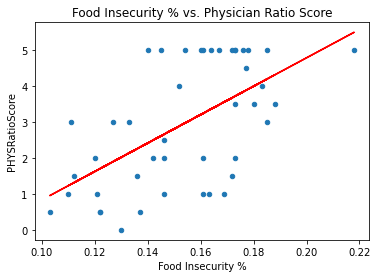

In [33]:
PCSA_FA_df.plot.scatter('[Revised Projections – March 2021]\r\n2020 Food Insecurity  %', 'PHYSRatioScore')

print(f'r-value: {rValue}')
print(f'r-squared value: {rValue ** 2}')

slope, intercept, rValue, pValue, std_err = linregress(PCSA_FA_df['[Revised Projections – March 2021]\r\n2020 Food Insecurity  %'], PCSA_FA_df['PHYSRatioScore'])

regress_value = PCSA_FA_df['[Revised Projections – March 2021]\r\n2020 Food Insecurity  %'] * slope + intercept

plt.plot(PCSA_FA_df['[Revised Projections – March 2021]\r\n2020 Food Insecurity  %'], regress_value, 'r-')
plt.xlabel('Food Insecurity %')
plt.title('Food Insecurity % vs. Physician Ratio Score')

plt.show()

